## EDA - Scatter plots

In this notebook, we will examine pairs of variables using scatter plots.

But before we do all that, we first need to import to required packages and upload to data to a a dataframe.

### Imports and data uploading



In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [58]:
pok = pd.read_csv('pokemon.csv', header=0, sep=',') 

### Scatter plots



We will start by making a scatter plot to examine the relationship between the variables defense and attack, using a figure object. 
We first create a figure object, and then save the object axes of the new figure into the variable ax. Next we call scatter using ax. As parameters, we pass the pair of variables that we want to explore - defense and attack. Note that we also add axes labels using xlabel and ylabel. 

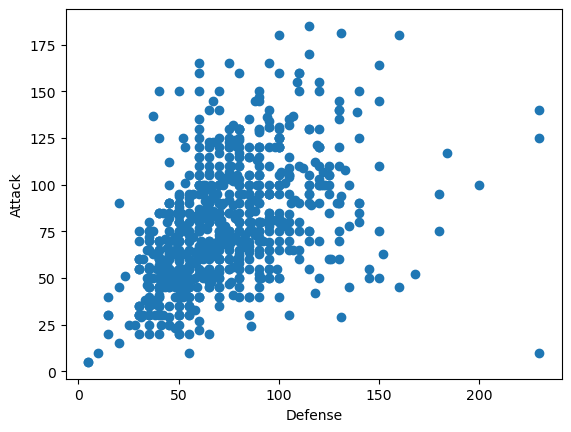

In [59]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(pok.defense, pok.attack)
plt.xlabel('Defense')
plt.ylabel('Attack')
plt.show()

We are interested to know if there is a difference between legrndary and ordinary pokemons. To see that, we will make scatter but with different colors for these two categories. We send *scatter* a third parameter, c . Look at the way c is defined, and how it changes our scatter plot: 

In [60]:
colormap = np.array(['b', 'r'])

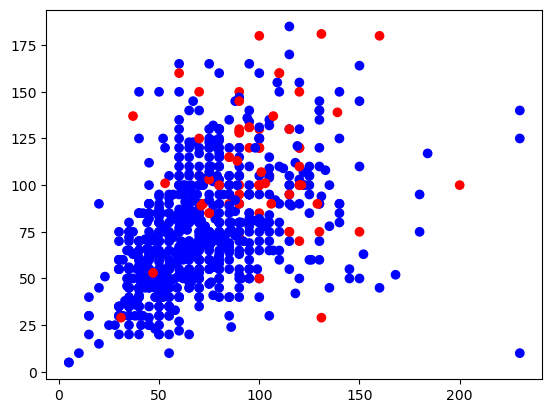

In [61]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(pok.defense, pok.attack, c = colormap[pok.is_legendary])
plt.show()

The thing is, some of the red pokemons, which are the legendary pokemons, are hidden in the plot we made. We can me sure we see all of them if we add the red points after the other points are made, like this:

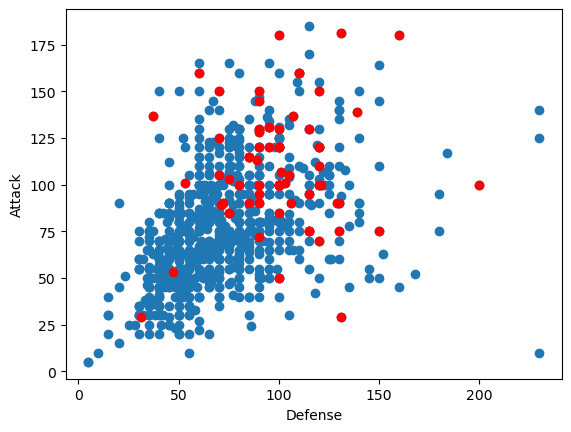

In [62]:
#fig = plt.figure()
ax = plt.axes()
ax.scatter(pok.defense, pok.attack) #drawing all pokemons
plt.xlabel('Defense')
plt.ylabel('Attack')
ax.scatter(pok.defense[pok.is_legendary==1], pok.attack[pok.is_legendary==1], c='red') #drawing only is_legendary in red
plt.show()

### Pearson correlation coefficient

It does look like the two variables have the same trand, and that the relationship is linear. We will check if there's a correlation between these two numerical variables. we will use Pearson correlation coefficient, calculated by the function corr. Make sure to remind yourself what this coefficient is, and how it's defined. In the next cell, we check what are the coefficients between three variables - defense, attack and speed:

In [63]:
pok[['defense', 'attack', 'speed']].corr()

,defense,attack,speed
defense,1.000000,0.468915,0.007934
attack,0.468915,1.000000,0.352703
speed,0.007934,0.352703,1.000000


Pearson correlation coefficients lie between -1 to 1. Large absolute values (closer to 1) support strong correlations. Positive values support positive linear correlations, and negative values support negative linear correlations. Here, the strongest correlation is between attack and defense, with an r value of 0.468915. This correlation is positive, hence r is positive.  Note that the correlation of each variable to itself is always 1. 

### Line plots

The trend that was observed with the help of corr can also be observed using a plot called line plot. This type of plot is particularly useful for summarizing data as well as for examing values across time - such as income by year, etc. 

We will first use the function groupby in order to calculate the mean value of attack for each generation:

In [64]:
pok.groupby('generation').attack.mean()

generation
1    74.529801
2    69.960000
3    77.185185
4    82.672897
5    80.557692
6    76.527778
7    84.637500
Name: attack, dtype: float64

This seies of numbers can be presented using a line graph, in the following manner:

Text(0, 0.5, 'Mean attack')

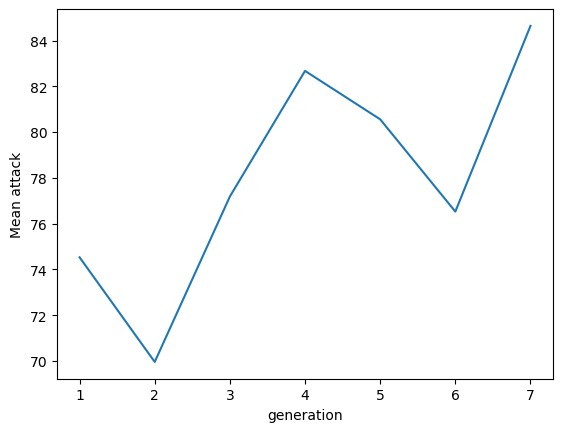

In [65]:
attack_mean = pok.groupby('generation').attack.mean()
attack_mean.plot(kind='line')  #kind=line is used in order to obtain a line plot
plt.ylabel('Mean attack')

For identyfing parallel trends (i.e. correlations), we can make a figure with a few line plots together:

<AxesSubplot:xlabel='generation'>

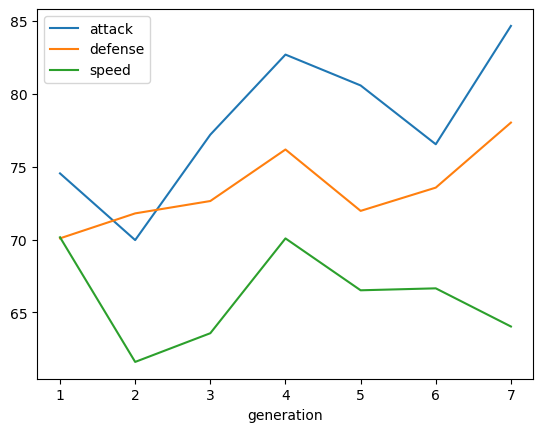

In [68]:
pokemon = pok.groupby(['generation']).mean()[['attack','defense','speed']]
pokemon.plot()  #kind=line can be skipped, since this is the default for the kind parameter


We can see quite clearly in this figure that the trends (for the means at least) are similar. 

We can add symbols that will be used in making these lines. In addition, we will play with the specifications of the legend.  

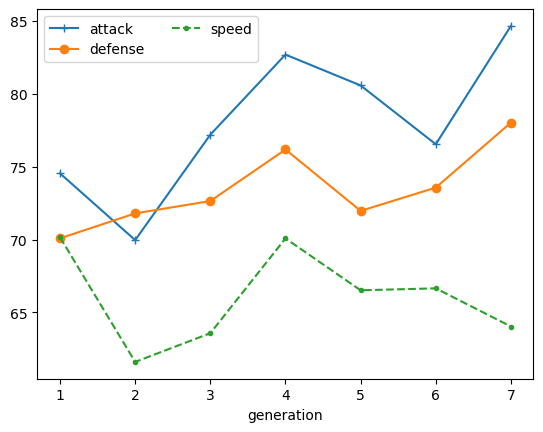

In [29]:
pokemon=pok.groupby(['generation']).mean()[['attack','defense','speed']]
pokemon.plot(style=['+-','o-','.--']).legend(loc='upper left', ncol=2)

### Legends

Legends are objects too. When we refer to this object, we can use *loc* to control the positional location of the legend - in our case, we chose 'upper left'. We also used another parameter, *ncol*, which determines the number of colomns in our legend. 